LAPTOP PRICE PREDICTOR

--> dataset given is in .csv file

--> we are going to do plotting and regression on the dataset

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("laptopPrice.csv")
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [16]:
print(df.isnull().sum())

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


In [17]:
print(df.describe())

               Price  Number of Ratings  Number of Reviews
count     823.000000         823.000000         823.000000
mean    76745.177400         315.301337          37.609964
std     45101.790525        1047.382654         121.728017
min     16990.000000           0.000000           0.000000
25%     46095.000000           0.000000           0.000000
50%     64990.000000          17.000000           2.000000
75%     89636.000000         139.500000          18.000000
max    441990.000000       15279.000000        1947.000000


plotting using matplotlib 

In [18]:
import matplotlib.pyplot as plt
import numpy as np

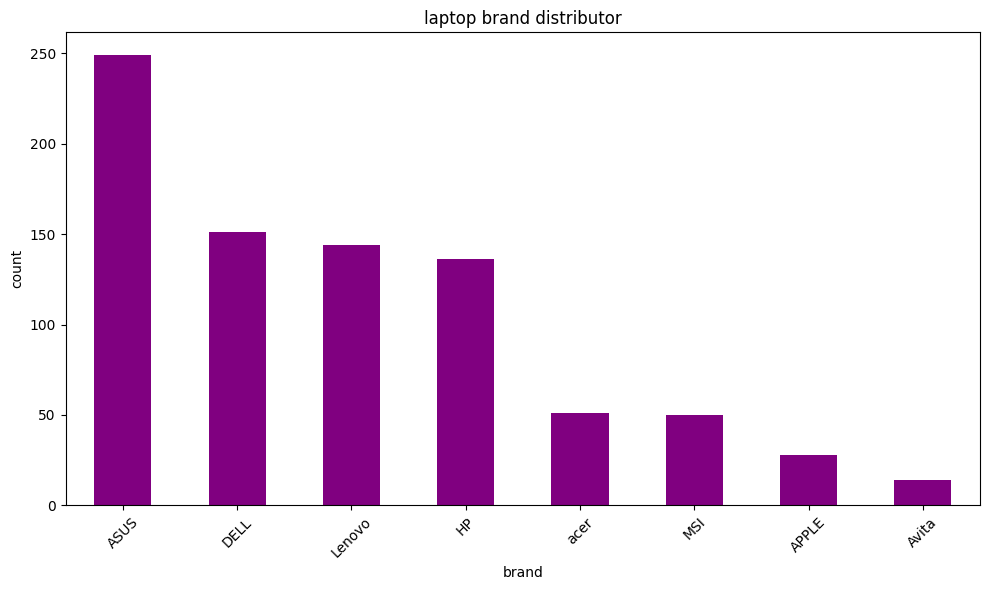

In [ ]:

df['brand'].value_counts().plot(kind = 'bar',figsize=(10,6), color= 'purple')
plt.title("laptop brand distributor")
plt.xlabel('brand')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

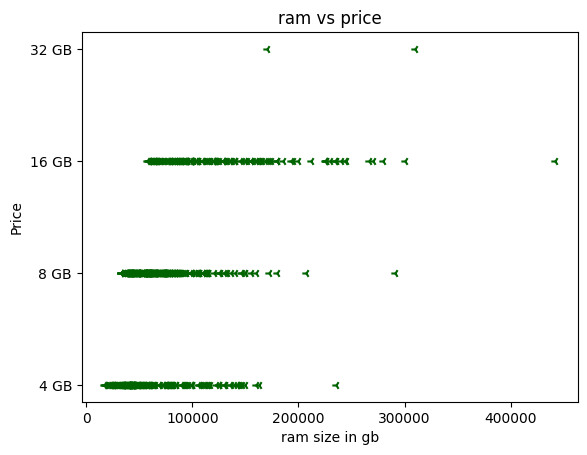

In [39]:
plt.scatter(df['Price'], df['ram_gb'], marker='3', color='darkgreen')
plt.title("ram vs price")
plt.ylabel('Price')
plt.xlabel('ram size in gb')
plt.show()

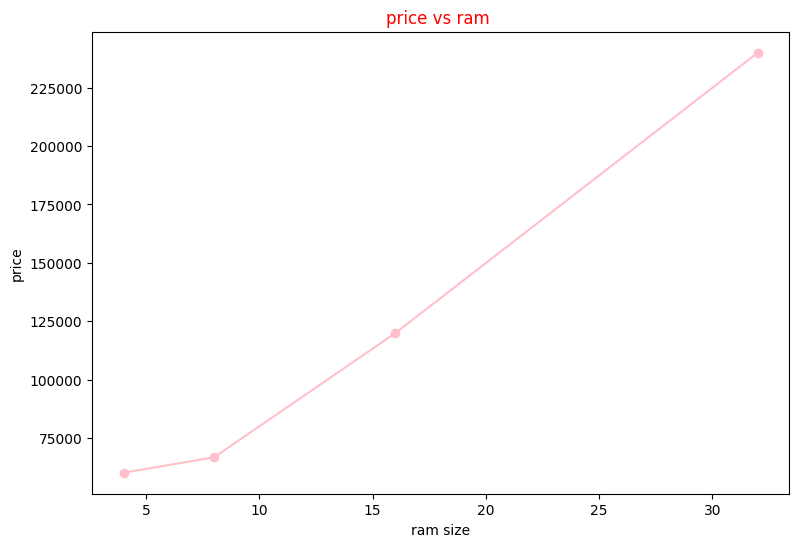

In [46]:
df['ram_gb_cleaned'] = df['ram_gb'].str.replace('GB','').astype(int)
avg_price = df.groupby('ram_gb_cleaned')['Price'].mean().sort_index()

plt.figure(figsize=(9,6))
plt.plot(avg_price.index,avg_price.values, marker='o',linestyle='-',color='pink')
plt.title("price vs ram ",color='red')
plt.xlabel('ram size')
plt.ylabel('price')
plt.show()

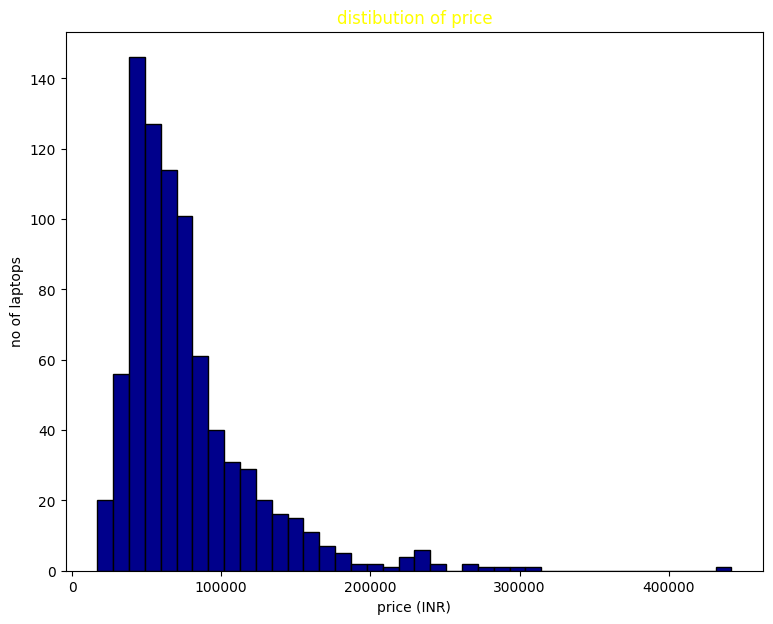

In [47]:
plt.figure(figsize=(9,7))
plt.hist(df['Price'], bins = 40,color = 'darkblue',edgecolor= 'black')
plt.title("distibution of price",color='yellow')
plt.xlabel('price (INR)')
plt.ylabel('no of laptops')
plt.show()

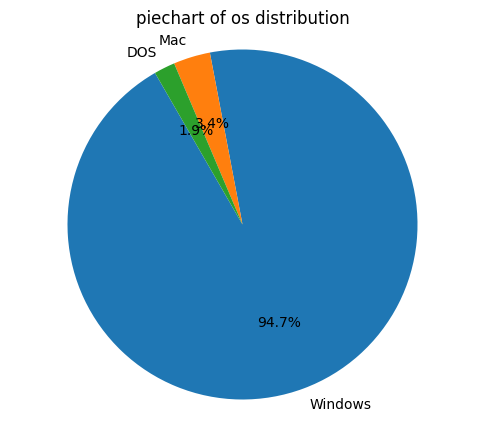

In [54]:
os_counts = df['os'].value_counts()

plt.figure(figsize=(6,5))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%',startangle = 120)
plt.title('piechart of os distribution')
plt.axis('equal')
plt.show()

plotting using seaborn



In [55]:
import seaborn as sns


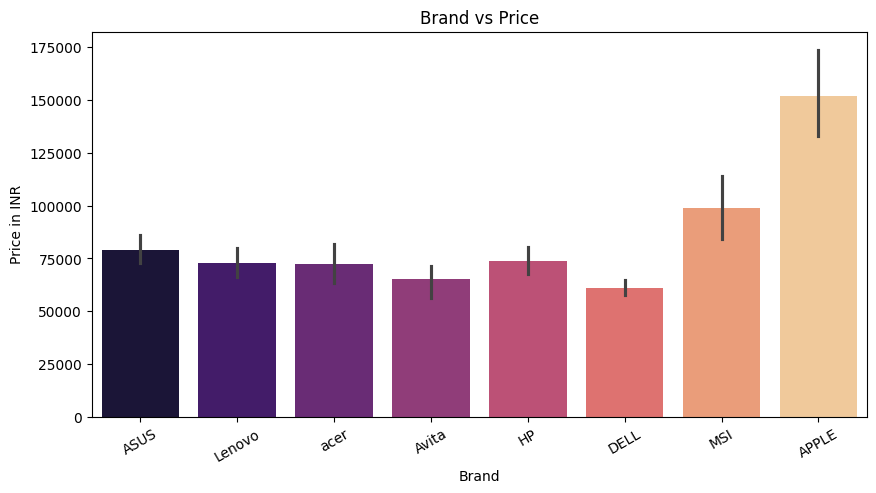

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['brand'], y=df['Price'],hue=df['brand'], palette='magma')
plt.title("Brand vs Price")
plt.xlabel("Brand")
plt.ylabel("Price in INR")
plt.xticks(rotation=30)
plt.show()

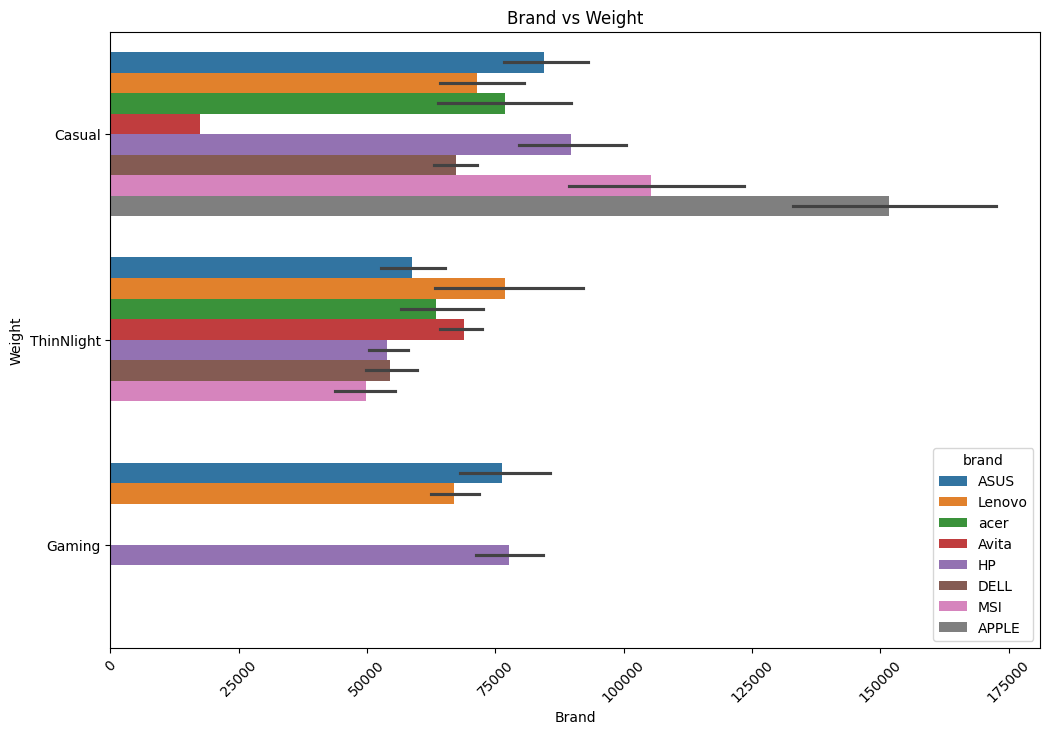

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Price"], y=df['weight'], hue=df['brand'])
plt.title("Brand vs Weight and Price")
plt.title("Brand vs Weight")
plt.xlabel("Brand")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()

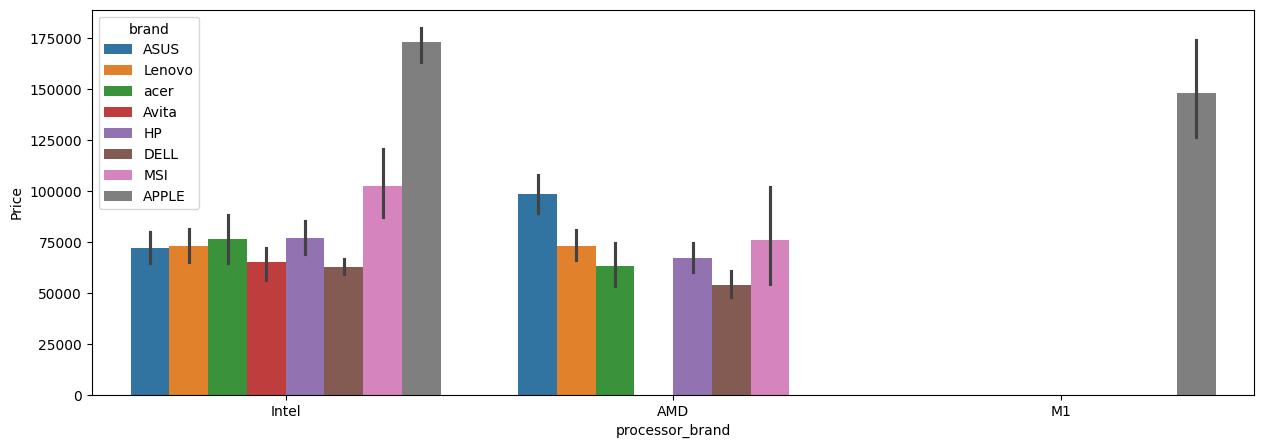

In [64]:
plt.figure(figsize=(15, 5))
plt.cycler(color=['blue', 'orange', 'green', 'red'])
sns.barplot(x=df['processor_brand'], y=df['Price'],hue=df['brand'])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Customizing the default color cycle
plt.show()

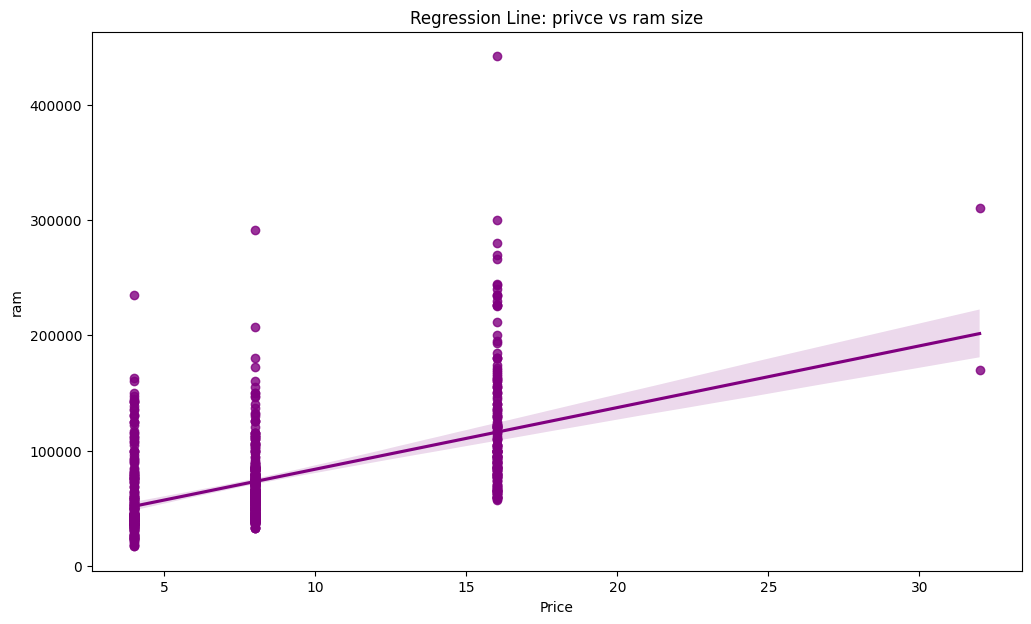

In [66]:
# as i have already cleared the data, removing gb from ram

plt.figure(figsize=(12,7))
sns.regplot(data = df, x= 'ram_gb_cleaned',y='Price', scatter_kws={'color':'purple'},line_kws={'color':'purple'})
plt.title("Regression Line: privce vs ram size")
plt.xlabel("Price")
plt.ylabel("ram")
plt.show()

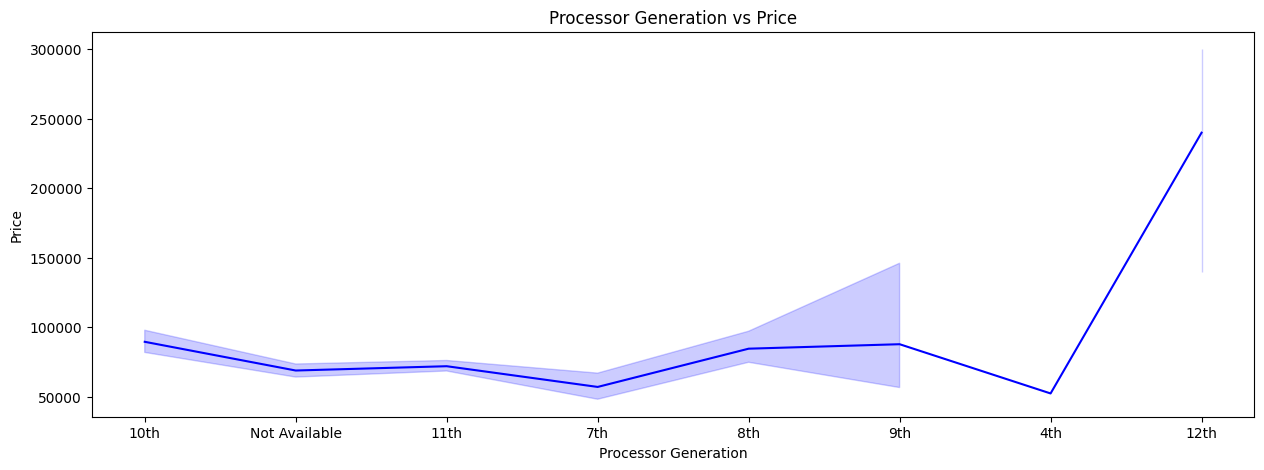

In [69]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=df['processor_gnrtn'], y=df['Price'], color='blue')
plt.title("Processor Generation vs Price")
plt.xlabel("Processor Generation")
plt.ylabel("Price")
plt.show()

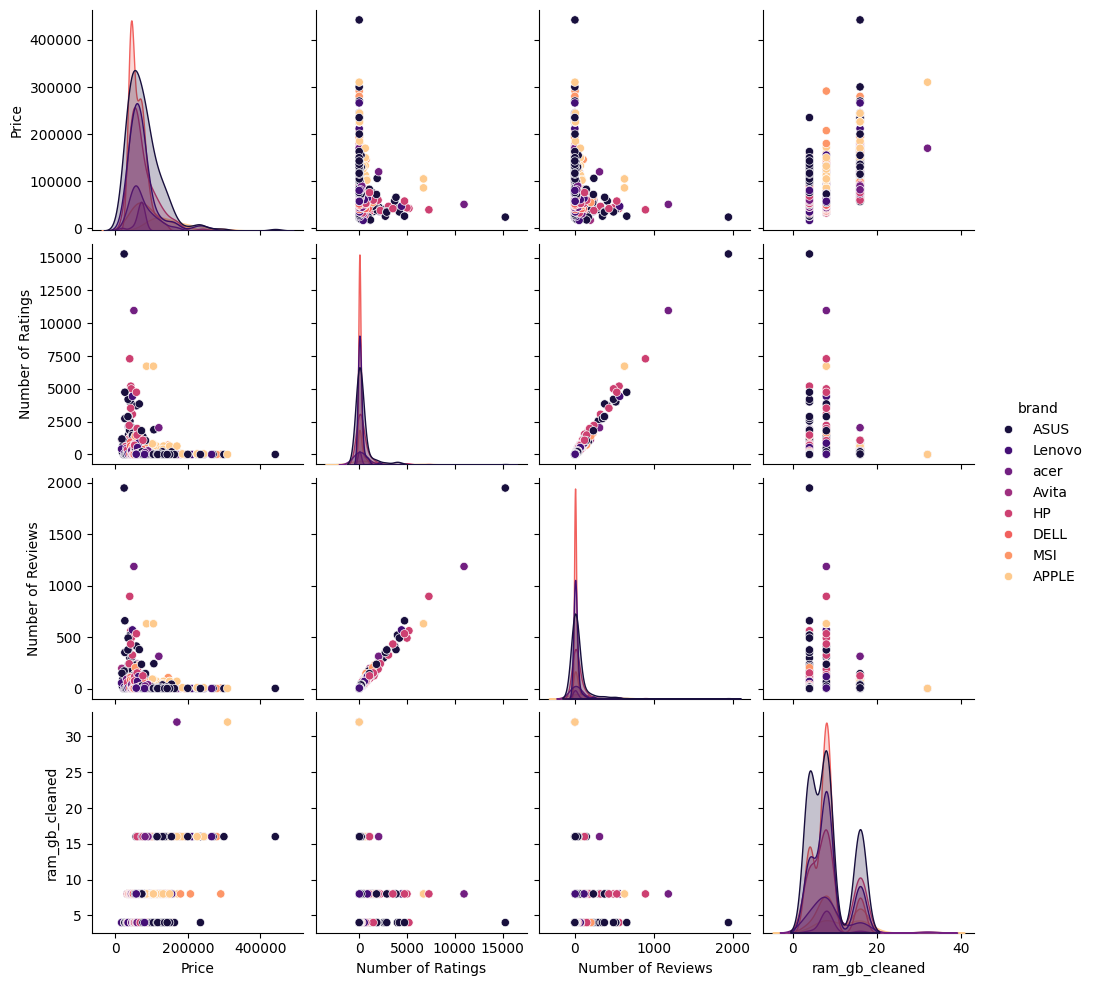

In [75]:
sns.pairplot(df, hue='brand', diag_kind='kde', palette='magma')

linear regression

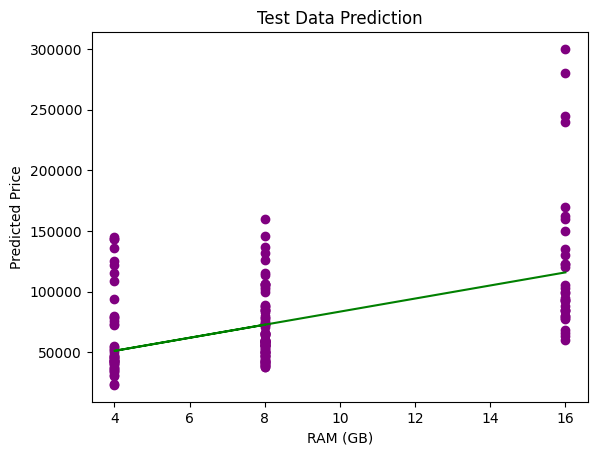

Intercept: 29512.265826120158
Coefficient: 5390.025624810616


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features and target

X = df[['ram_gb_cleaned']]  # independent variable(s)
y = df['Price']  # dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot predictions
plt.scatter(X_test, y_test, color='purple')
plt.plot(X_test, y_pred, color='green')  # regression line
plt.xlabel('RAM (GB)')
plt.ylabel('Predicted Price')
plt.title('Test Data Prediction')
plt.show()

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

In [78]:
df['ram_gb'] = df['ram_gb'].str.replace(' GB', '').astype(int)
df['ssd'] = df['ssd'].str.replace(' GB', '').astype(int)
df['hdd'] = df['hdd'].str.replace(' GB', '').astype(int)
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace(' GB', '').astype(int)
# Convert 'os_bit' from string to integer
df['os_bit'] = df['os_bit'].str.replace('-bit', '').astype(int)
# Convert 'rating' from "X stars" to numeric
df['rating'] = df['rating'].str.extract('(\d+)').astype(float)


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shreeya\AppData\Local\Temp\ipykernel_14976\863338947.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['rating'] = df['rating'].str.extract('(\d+)').astype(float)


In [84]:
numericals = df.select_dtypes(include=['int64', 'float64'])
categoricals = df.select_dtypes(include=['O'])
categorical_cols = [
    'brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
    'ram_type', 'os' ,"weight" , "warranty", "Touchscreen", "msoffice",
]

for cat in categorical_cols :
    print(categoricals[cat].value_counts())

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64
processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64
processor_name
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 9          26
Ryzen 3          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: count, dtype: int64
processor_gnrtn
11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: count, dtype: int64
ram_type
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64
os
Windows    779
Mac         28
DOS         16
Name: count, dtype: int64
weight
Casual        520
ThinNlight    264
Gaming         39
Name: count, dtype: int64
warranty
1 year   

In [ ]:
## making dictionary for each categorical column
categorical_dict = {}
for col in categorical_cols:
    categorical_dict[col] = {val: i for i, val in enumerate(data[col].unique())}
    print(categorical_dict[col])
    categoricals[col] = data[col].map(categorical_dict[col])